# An Investigation of Sorting Algorithms

**Notes:** Code cells are structured so you can 'Restart and Run All' if required. May be useful as many code cells are dependent on previous code cells.


### Libraries

In [1]:
import numpy as np # For randomly generating numbers
import pandas as pd #For reading csv files, generating dataframes and plots for same
import time

## Introduction

In the course of this investigation, I will discuss and benchmark the following sorting algorithms:
* Bubble Sort
* Insertion Sort
* Merge Sort
* Bucket Sort
* Tim Sort

## Generating Random Data

In [2]:
def rand(n):
    array = []
    for i in range(0, n, 1): # for every integer between 1 and n
        gen_rand= np.random.randint(0, 100) # generate a random number
        array.append(gen_rand) # and add it to the array
    return array

## Bubble Sort

In [3]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1): 
        for i in range(passnum): #Goes through a list from last value to first
            if alist[i]>alist[i+1]: # Compares every value to the values with a greater index
                temp = alist[i]  
                alist[i] = alist[i+1] 
                alist[i+1] = temp #If statement swap two values, so the larger value has the larger index
                
# Reference: interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html, accessed 13th April 2019.

In [4]:
%timeit(bubbleSort)

50.7 ns ± 8.91 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
start =time.time()
bubbleSort(rand(10)) #10 random variables
end = time.time()

np.round((end - start)* 1000, 3)

In [ ]:
start =time.time()
bubbleSort(rand(10000)) #10,000
end = time.time()


np.round((end - start)* 1000, 3)

## Insertion Sort

In [7]:
def binary_search(the_array, item, start, end):
    if start == end:
        if the_array[start] > item:
            return start
        else:
            return start + 1
    if start > end:
        return start

    mid = round((start + end)/ 2) #Returns the mean of the range of indices 
    
    # determine which side to search
    if the_array[mid] < item:
        return binary_search(the_array, item, mid + 1, end) # search array of indices above mid

    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1) # search array of indices above mid

    else:
        return mid # Otherwise mid = item, so return mid

In [8]:
def insertionSort(the_array):
        
    l = len(the_array) #set l to the number of values in array
    for index in range(1, l): #for the every index
        value = the_array[index] #set value
        pos = binary_search(the_array, value, 0, index - 1) 
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]

#Reference:http://interactivepython.org/courselib/static/pythonds/SortSearch/TheInsertionSort.html, accessed 13th April 2019.
#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [9]:
%timeit(insertionSort)

55.3 ns ± 2.74 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
start =time.time()
insertionSort(rand(10)) #10 random variables
end = time.time()


np.round((end - start)* 1000, 3)

In [ ]:
start =time.time()
insertionSort(rand(10000)) #10,000 random variables
end = time.time()


np.round((end - start)* 1000, 3)

## Merge Sort

In [12]:
def mergeSort(alist):

    if len(alist)>1:
        mid = len(alist)//2 #get value of middle index
        lefthalf = alist[:mid] #lower subarray is below mid
        righthalf = alist[mid:] #upper subarray is above mid

        mergeSort(lefthalf) 
        mergeSort(righthalf) #Pass both subarrays back into merge sort

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1 
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1 
            
#Reference: http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html, accessed 13th April 2019.

In [13]:
%timeit(mergeSort)

54.9 ns ± 2.59 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
start =time.time()
mergeSort(rand(10)) #10 random variables
end = time.time()


np.round((end - start)* 1000, 3)

In [ ]:
start =time.time()
mergeSort(rand(10000)) #10,000 random variables
end = time.time()

np.round((end - start)* 1000, 3)

In [ ]:
start =time.time()
mergeSort(rand(100000))
end = time.time()

np.round((end - start)* 1000, 3)

## Bucket Sort

In [17]:
def insertion_sort(the_array):
    l = len(the_array)
    for index in range(1, l):
        value = the_array[index]
        pos = binary_search(the_array, value, 0, index - 1)
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    the_array
    
#Reference and code are the same as insertionSort above. This function returns the_array instead of time elapsed

In [18]:
def bucketSort(alist):
    largest = max(alist) #Set max
    length = len(alist) #Set input size = length
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertionSort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]

#Reference: https://www.sanfoundry.com/python-program-implement-bucket-sort/, accessed 13th April 2019.

In [19]:
%timeit(bucketSort)

54 ns ± 3.32 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
start =time.time()
bucketSort(rand(10))
end = time.time()

np.round((end - start)* 1000, 3)

In [ ]:
start =time.time()
bucketSort(rand(100000))
end = time.time()

np.round((end - start)* 1000, 3)

## TimSort

In [22]:
def merge(left, right): #Input is two sorted lists
    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [23]:
def timSort(the_array):
 
    runs, sorted_runs = [], []
    length = len(the_array)
    new_run = [the_array[0]]

    # for every i in the range of 1 to length of array
    for i in range(1, length):
        # if i is at the end of the list
        if i == length - 1:
            new_run.append(the_array[i])
            runs.append(new_run)
            break
        # if the i'th element of the array is less than the one before it
        if the_array[i] < the_array[i-1]:
            # if new_run is set to None (NULL)
            if not new_run:
                runs.append([the_array[i]])
                new_run.append(the_array[i])
            else:
                runs.append(new_run)
                new_run = []
        # else if its equal to or more than
        else:
            new_run.append(the_array[i])

    # for every item in runs, append it using insertion sort
    for item in runs:
        sorted_runs.append(insertionSort(item))
    
    # for every run in sorted_runs, merge them
    sorted_array = []
    for run in sorted_runs:
        sorted_array = merge(sorted_array, run)


#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [24]:
%timeit(timSort)

91.6 ns ± 8.86 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
start =time.time()
timSort(rand(100000))
end = time.time()
np.round((end - start)* 1000, 3)

## Benchmarking Functions

In [27]:
# Passes 10 unique and randomly generated arrays to 5 functions ONLY ONCE
def compare_all(func, func2, func3, func4, func5):
    
    array_1 = []
    array_2 = []
    array_3 = []
    array_4 = []
    array_5 = []
    array_6 = []
    
    # Rand_size = input size of randomly generated datasets
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    
    for i in rand_size:
            start = time.time()
            func(rand(i)) #Pass 10 randomly generated dataset through each function
            end = time.time()
            y = round(((end - start)*1000), 3)
            start = time.time()
            func2(rand(i))
            end = time.time()
            y1 = round(((end - start)*1000), 3)
            start = time.time()
            func3(rand(i))
            end = time.time()
            y2 = round(((end - start)*1000), 3)
            start = time.time()
            func4(rand(i))
            end = time.time()
            y3 = round(((end - start)*1000), 3)
            start = time.time()
            func5(rand(i))
            end = time.time()
            y4 = round(((end - start)*1000), 3)
            
            x = i #Set x equal to the size
    
            array_1.append(x) #Add x values to array 1 
            array_2.append(y) #Add y values to their arrays
            array_3.append(y1)
            array_4.append(y2)
            array_5.append(y3)
            array_6.append(y4)
    
    df = pd.DataFrame({'Input Size': array_1, 'BubbleSort': array_2, 'InsertionSort': array_3, 'MergeSort': array_4, 
                             'BucketSort': array_5, 'TimSort':array_6})
    df.to_csv("data/run_once.csv", index=False)
         

In [28]:
def mean_array(the_array):
    average_time = []
    y1 = np.mean(the_array[slice(0, 10, 1)])
    y2 = np.mean(the_array[slice(10, 20, 1)])
    y3 = np.mean(the_array[slice(20, 30, 1)])
    y4 = np.mean(the_array[slice(30, 40, 1)])
    y5 = np.mean(the_array[slice(40, 50, 1)])
    y6 = np.mean(the_array[slice(50, 60, 1)])
    y7 = np.mean(the_array[slice(60, 70, 1)])
    y8 = np.mean(the_array[slice(70, 80, 1)])
    y9 = np.mean(the_array[slice(80, 90, 1)])
    y10 =np.mean(the_array[slice(90, 100, 1)])
    
    results = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]
    return results

In [53]:
def bench_ten_runs():
    results=[]
    average_time = []
    final_array= []
    num_runs = 10
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    functions = [bubbleSort, insertionSort, mergeSort, bucketSort, timSort]
    
  
    for func in functions: #For each function
        for i in rand_size: #input a value
            size = rand(i) 
            for r in range(num_runs):#ten times
                start = time.time()
                func(size) 
                end = time.time()
                clock = (end - start)*1000
                results.append(clock)  # Add time elapsed to array results
        average_time = mean_array(results) # Find average time, for each i in rand_size, using mean_array()
        average_time = np.round(average_time, 3) # Round result to 3 dps
        final_array.append(average_time) # Append to final_array
        average_time = [] #set both average_time
        results=[]  #and results to [], before passing through the next function
        
    df4 = pd.DataFrame({'Input Size': rand_size, 'BubbleSort': final_array[0], 
                       'InsertionSort': final_array[1], 'MergeSort': final_array[2], 
                             'BucketSort':final_array[3], 'TimSort':final_array[4]})
    
    df4.to_csv("data/avg_ten_runs.csv", index=False)

## Comparing Sorting Algorithms 

In [30]:
compare_all(bubbleSort, insertionSort, mergeSort, bucketSort, timSort)

In [31]:
df = pd.read_csv('data/run_once.csv')
df

,Input Size,BubbleSort,InsertionSort,MergeSort,BucketSort,TimSort
0,10,0.000,0.000,0.000,0.000,0.000
1,50,1.000,1.000,0.000,1.000,0.000
2,100,3.002,1.003,0.995,0.998,1.000
3,250,11.005,22.006,2.999,15.006,2.000
4,500,64.016,41.011,19.005,18.007,2.999
5,750,143.036,36.010,19.004,10.006,3.999
6,1000,259.062,43.018,12.000,35.007,7.003
7,5000,7845.987,1129.289,98.021,168.048,60.011
8,7500,17313.392,1499.381,142.035,390.101,58.013
9,10000,37755.574,3177.803,196.050,597.157,89.020


In [ ]:
ax = df.plot(x='Input Size', y=['BubbleSort', 'InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

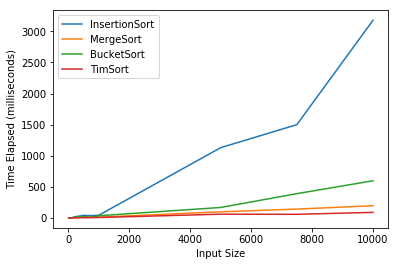

In [33]:
ax = df.plot(x='Input Size', y=['InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

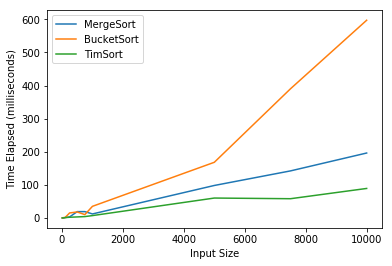

In [34]:
ax = df.plot(x='Input Size', y=['MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

## Benchmarking Sorting Algorithms

In [54]:
bench_ten_runs()

In [55]:
df2 = pd.read_csv('data/avg_ten_runs.csv')
df2

,Input Size,BubbleSort,InsertionSort,MergeSort,BucketSort,TimSort
0,10,0.000,0.000,0.000,0.100,0.100
1,50,0.300,0.400,0.200,0.200,0.100
2,100,1.101,1.000,0.499,0.500,0.100
3,250,9.502,3.801,1.601,1.300,0.500
4,500,28.507,10.803,3.200,3.501,0.900
5,750,58.514,20.105,9.902,8.202,1.400
6,1000,96.424,33.708,7.702,15.804,1.900
7,5000,2997.760,597.751,47.812,101.726,27.607
8,7500,6970.468,1540.690,85.422,370.294,15.704
9,10000,12516.474,2740.495,143.336,508.829,44.512


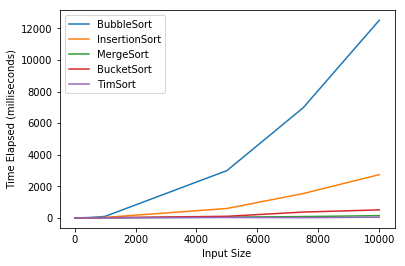

In [56]:
ax = df2.plot(x='Input Size', y=['BubbleSort','InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

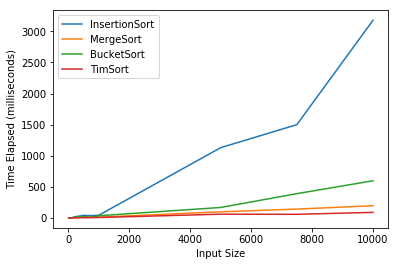

In [57]:
ax = df.plot(x='Input Size', y=['InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

## References


#### Documentation
* [The Python Standard Library](https://docs.python.org/3/library/)
> * [Time](https://docs.python.org/3/library/time.html) function, accessed 13th April 2019. 
> * [Reading and Writing CSV files](https://docs.python.org/3/library/csv.html), accessed 13th April 2019.
* [Pandas Documentation]()
> * [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) function, accessed 13th April 2019.
___